In [1]:
from nltk.corpus import stopwords
import string

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text


In [2]:
# turn a doc into clean tokens
def clean_doc(doc):
    tokens = doc.split()
 
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load the document
filename = '/Users/halahalsaadi/Downloads/aclImdb/train/pos/7777_10.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

['Rich', 'alcoholic', 'Robert', 'Stack', 'falls', 'love', 'secretary', 'Lauren', 'Bacall', 'He', 'marries', 'happy', 'stops', 'drinking', 'However', 'Bacall', 'secretly', 'loved', 'Stacks', 'best', 'friend', 'Rock', 'Hudson', 'And', 'Stacks', 'nymphomaniac', 'sister', 'Dorothy', 'Malone', 'lusts', 'Rock', 'Throw', 'complications', 'movie', 'goes', 'spinning', 'control', 'good', 'waybr', 'br', 'Very', 'glossy', 'movie', 'beautiful', 'Technicolor', 'jawdropping', 'fashions', 'furnishings', 'check', 'Bacalls', 'hotel', 'room', 'beginning', 'Everybody', 'looks', 'perfect', 'dresses', 'beautiful', 'formfitting', 'clothes', 'Basically', 'soap', 'opera', 'grade', 'production', 'values', 'The', 'story', 'lots', 'fun', 'dialogue', 'beginning', 'hilariously', 'top', 'The', 'acting', 'Hudson', 'Stack', 'Bacall', 'isnt', 'good', 'seeing', 'young', 'glamorous', 'greatespecially', 'Stackwhen', 'smiled', 'knees', 'went', 'weak', 'Dorothy', 'Malone', 'hand', 'fantasticshe', 'deservedly', 'Best', 'Supp

In [3]:
directory = '/Users/halahalsaadi/Downloads/aclImdb'

In [4]:
#define a vocabulary
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens


def process_docs(directory, vocab):
    for filename in listdir(directory):
        if filename.startswith('test'):
            continue
        path = directory + '/' + filename
        add_doc_to_vocab(path, vocab)




# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    vocab.update(tokens)
vocab = Counter()
process_docs('/Users/halahalsaadi/Downloads/aclImdb/train/pos', vocab)
process_docs('/Users/halahalsaadi/Downloads/aclImdb/train/neg', vocab)

print(len(vocab))
print(vocab.most_common(50))

138430
[('br', 57141), ('The', 44351), ('movie', 41198), ('film', 37009), ('one', 23188), ('like', 18876), ('This', 14725), ('good', 13927), ('It', 12074), ('would', 12010), ('time', 11504), ('really', 11276), ('story', 11058), ('even', 10882), ('see', 10854), ('much', 9289), ('get', 8996), ('people', 8474), ('bad', 8456), ('great', 8260), ('made', 7887), ('first', 7881), ('well', 7850), ('also', 7722), ('make', 7599), ('films', 7597), ('movies', 7587), ('could', 7567), ('way', 7467), ('dont', 7333), ('But', 7216), ('characters', 7183), ('think', 7078), ('Its', 6738), ('And', 6715), ('seen', 6486), ('character', 6455), ('watch', 6269), ('many', 6233), ('two', 6171), ('plot', 6137), ('acting', 6110), ('never', 6101), ('little', 5981), ('know', 5954), ('In', 5880), ('best', 5717), ('love', 5701), ('show', 5683), ('life', 5651)]


In [5]:
# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

65663


In [6]:
# save list to file
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab2.txt')

In [7]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

In [8]:
# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    for filename in listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('test'):
            continue
            path = directory + '/' + filename
            line = doc_to_line(path, vocab)
            lines.append(line)
            return lines

In [9]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):# open the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    for filename in listdir(directory):
        if filename.startswith('test'):
            continue
        path = directory + '/' + filename
        line = doc_to_line(path, vocab)
        lines.append(line)
    return lines

# load the vocabulary
vocab_filename = 'vocab2.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('/Users/halahalsaadi/Downloads/aclImdb/train/pos', vocab)
negative_lines = process_docs('/Users/halahalsaadi/Downloads/aclImdb/train/neg', vocab)
print(len(positive_lines), len(negative_lines))

12500 12500


In [10]:
import os
train_dir = os.path.join(directory, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100 
training_samples = 1500 
validation_samples = 500 
max_words = 10000
       
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples] 
y_val = labels[training_samples: training_samples + validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [13]:
glove_dir = '/Users/halahalsaadi/Downloads/glove'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [14]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [15]:
epochs = 15
batch_size = 128

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Train on 1500 samples, validate on 500 samples
Epoch 1/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7011 - acc: 0.4940 - val_loss: 0.6952 - val_acc: 0.5220
Epoch 2/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6912 - acc: 0.5320 - val_loss: 0.6895 - val_acc: 0.5440
Epoch 3/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6826 - acc: 0.5553 - val_loss: 0.6849 - val_acc: 0.5620
Epoch 4/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6736 - acc: 0.5927 - val_loss: 0.6795 - val_acc: 0.5700
Epoch 5/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6651 - acc: 0.6140 - val_loss: 0.6739 - val_acc: 0.5900
Epoch 6/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6533 - acc: 0.6380 - val_loss: 0.6624 - val_acc: 0.5880
Epoch 7/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6400 - acc: 0.6467 - val_loss: 0.6496 - val_acc: 0.6220
Epoch 8/15
1500

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

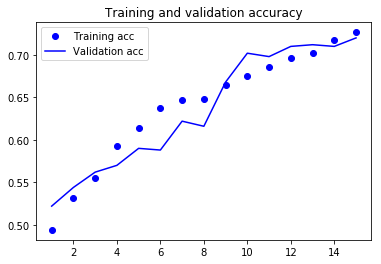

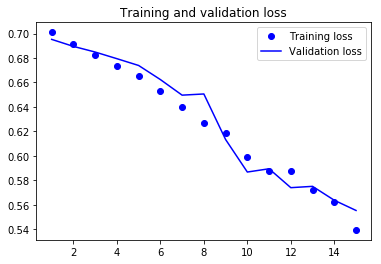

In [19]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
test_dir = os.path.join(directory, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
        
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [24]:
model.load_weights('pre_trained_glove_model.h5')
score, acc = model.evaluate(x_test, y_test)

25000/25000 [==============================] - -10s -390us/step


In [27]:
print('Test score:', score)
print('Test accuracy:', score)

Test score: 0.5411666754055023
Test accuracy: 0.5411666754055023
